In [1]:
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import rasterio
import rasterio.plot as rioplot
import os
from osgeo import gdal
import shapefile
import shapely.geometry as shp
from rasterio import mask

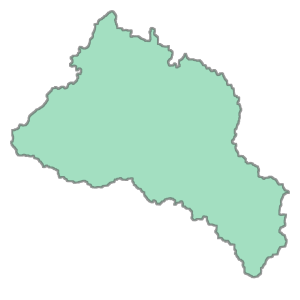

In [2]:
sf = shapefile.Reader("../scene_30m_mask.shp")
recs    = sf.records()
shapes  = sf.shapes()
Nshp    = len(shapes)
cns     = []

for nshp in  range(Nshp):
    ptchs   = []
    pts     = np.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    poly = [shp.Polygon(pts[par[pij]:par[pij+1]]) for pij in range(len(prt))]
multipolygon2 = shp.MultiPolygon(poly)    
multipolygon2

In [3]:
datafiles = ["tmean_2015-2014","tmax_2015-2014","tmin_2015-2014","tmean_2015-2016","tmax_2015-2016","tmin_2015-2016"]
data_matrices = []
for files in datafiles:
    print(files)
    input_prismfile = '../interimfiles/prism_diff_{}.tif'.format(files)
    input_raster = gdal.Open(input_prismfile)
    output_raster = 'test_epsg32611'
    gdal.Warp(output_raster,input_raster,dstSRS='EPSG:32611')
    prism_new_projection = rasterio.open(output_raster)
    prism_diff_cropped = rasterio.mask.mask(prism_new_projection,multipolygon2,nodata = -9999,crop = True)
    data_matrices.append(prism_diff_cropped[0])
    del input_prismfile, input_raster, output_raster, prism_new_projection, prism_diff_cropped
data_for_plotting = np.reshape(np.array(data_matrices),(6,13,13))
data_for_plotting= np.ma.masked_values(data_for_plotting, -9999.)

tmean_2015-2014
tmax_2015-2014
tmin_2015-2014
tmean_2015-2016
tmax_2015-2016
tmin_2015-2016


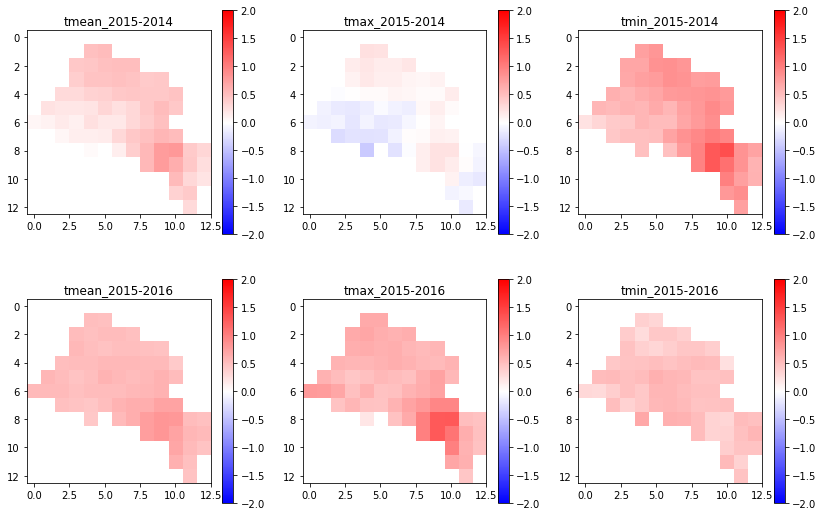

In [5]:
plt.figure(figsize=(14,14))
plot_number=1
for matrix in data_for_plotting:
   ax = plt.subplot(3,3, plot_number)
   plt.imshow(matrix, vmin = -2, vmax = 2,cmap = 'bwr')
   plt.title(datafiles[plot_number-1])
   plot_number = plot_number + 1
   plt.colorbar()

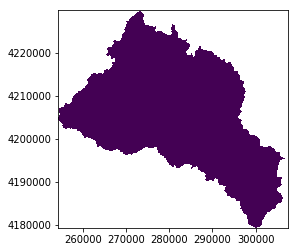

In [8]:
data_30m = rasterio.open('../scene_30m_mask.tif')
rioplot.show(data_30m, with_bounds=True)